假设我们在时间步t有小批量输入$X_t ∈ R^{n×d}$。换言之，对于n个序列样本的小批量，Xt的每一行对应于来自该序列的时间步t处的一个样本。

接下来，用Ht ∈ Rn×h 表示时间步t的隐藏变量。与多层感知机不同的是，我们在这里保存了前一个时间步的隐藏变量Ht−1，并引入了一个新的权重参数Whh ∈ Rh×h，来描述如何在当前时间步中使用前一个时间步的隐藏变量。

具体地说，当前时间步隐藏变量由当前时间步的输入与前一个时间步的隐藏变量一起计算得出：

Ht = φ(XtWxh + Ht−1Whh + bh). (8.4.5)

与 (8.4.3)相比，(8.4.5)多添加了一项 $H_{t−1}W_{hh}$，从而实例化了 (8.4.2)。从相邻时间步的隐藏变量Ht和 $H_{t−1}$之间的关系可知，这些变量捕获并保留了序列直到其当前时间步的历史信息，就如当前时间步下神经网络的状态或记忆，因此这样的隐藏变量被称为隐状态（hidden state）。

由于在当前时间步中，隐状态使用的定义与前一个时间步中使用的定义相同，因此 (8.4.5)的计算是循环的（recurrent）。于是基于循环计算的隐状态神经网络被命名为 循环神经网络（recurrent neural network）。在循环神经网络中执行 (8.4.5)计算的层称为循环层（recurrent layer）。

循环神经网络在三个相邻时间步的计算逻辑。在任意时间步t，隐状态的计算可以被视为：
1. 拼接当前时间步t的输入Xt和前一时间步t − 1的隐状态Ht−1；
2. 将拼接的结果送入带有激活函数φ的全连接层。全连接层的输出是当前时间步t的隐状态Ht。

在本例中，模型参数是Wxh和Whh的拼接，以及bh的偏置，所有这些参数都来自 (8.4.5)。当前时间步t的隐状态Ht 将参与计算下一时间步t + 1的隐状态Ht+1。而且Ht还将送入全连接输出层，用于计算当前时间步t的输出O.
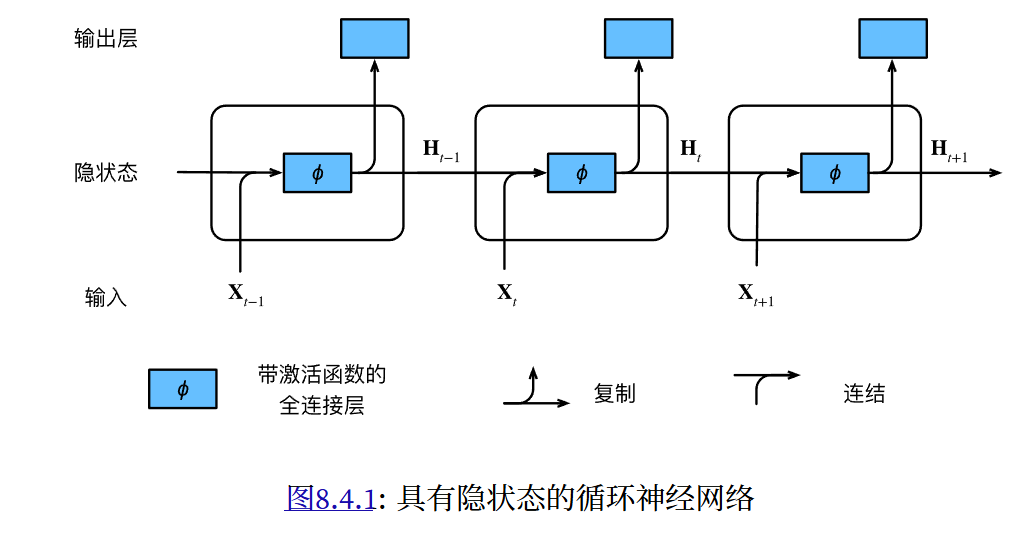

**隐状态中 $X_tW_{xh} + H_{t−1}W_{hh}$的计算，相当于$X_t$和$H_{t−1}$的拼接与$W_{xh}$和Whh的拼接的矩阵乘法。**

#### 基于RNN的字符级语言模型
回想一下 8.3节中的语言模型，我们的目标是根据过去的和当前的词元预测下一个词元，因此我们将原始序列移位一个词元作为标签。Bengio等人首先提出使用神经网络进行语言建模 (Bengio et al., 2003)。

接下来，我们看一下如何使用循环神经网络来构建语言模型。设小批量大小为1，批量中的文本序列为“machine”。为了简化后续部分的训练，我们考虑使用 字符级语言模（character‐level language model），将文本词元化为字符而不是单词。

图8.4.2演示了如何通过基于字符级语言建模的循环神经网络，使用当前的和先前的字符预测下一个字符。
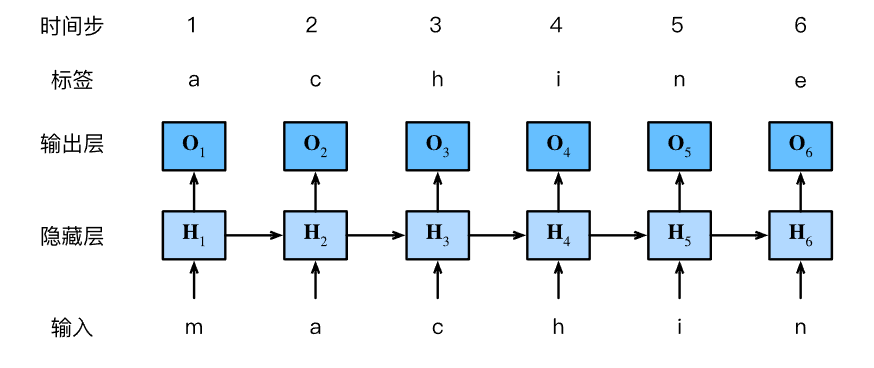

#### 8.4.4 困惑度（Perplexity）
最后，让我们讨论如何度量语言模型的质量，这将在后续部分中用于评估基于循环神经网络的模型。一个好的语言模型能够用高度准确的词元来预测我们接下来会看到什么。考虑一下由不同的语言模型给出的对“Itis raining ⋯”（“⋯下雨了”）的续写：
1. “It is raining outside”（外面下雨了）；
2. “It is raining banana tree”（香蕉树下雨了）；
3. “It is raining piouw;kcj pwepoiut”（piouw;kcj pwepoiut下雨了）。
   
就质量而言，例1显然是最合乎情理、在逻辑上最连贯的。虽然这个模型可能没有很准确地反映出后续词的语义，比如，“It is raining in San Francisco”（旧金山下雨了）和“It is raining in winter”（冬天下雨了）可能才是更完美的合理扩展，但该模型已经能够捕捉到跟在后面的是哪类单词。

例2则要糟糕得多，因为其产生了一个无意义的续写。尽管如此，至少该模型已经学会了如何拼写单词，以及单词之间的某种程度的相关性。

最后，例3表明了训练不足的模型是无法正确地拟合数据的。

### 回顾信息论
#### 信息量
压缩与预测有什么关系呢？想象一下，我们有一个要压缩的数据流。如果我们很容易预测下一个数据，那么这个数据就很容易压缩。为什么呢？举一个极端的例子，假如数据流中的每个数据完全相同，这会是一个非常无聊的数据流。由于它们总是相同的，我们总是知道下一个数据是什么。所以，为了传递数据流的内容，我们不必传输任何信息。也就是说，“下一个数据是xx”这个事件毫无信息量。

但是，如果我们不能完全预测每一个事件，那么我们有时可能会感到“惊异”。克劳德·香农决定用信息量$log 1P (j) = − log P (j)$来量化这种惊异程度。在观察一个事件j时，并赋予它（主观）概率$P(j)$。当我们赋予一个事件较低的概率时，我们的惊异会更大，该事件的信息量也就更大。在 (3.4.11)中定义的熵，是当分配的概率真正匹配数据生成过程时的信息量的期望。

#### 重新审视交叉熵

如果把熵H(P )想象为“知道真实概率的人所经历的惊异程度”，那么什么是交叉熵？交叉熵从P 到Q，记为H(P, Q)。我们可以把交叉熵想象为“主观概率为Q的观察者在看到根据概率P 生成的数据时的预期惊异”。

当P = Q时，交叉熵达到最低。在这种情况下，从P 到Q的交叉熵是H(P, P ) = H(P )。
简而言之，我们可以从两方面来考虑交叉熵分类目标：

（i）最大化观测数据的似然；（ii）最小化传达标签所需的惊异。

如果想要压缩文本，我们可以根据当前词元集预测的下一个词
元。一个更好的语言模型应该能让我们更准确地预测下一个词元。因此，它应该允许我们在压缩序列时花费
更少的比特。所以我们可以通过一个序列中所有的n个词元的交叉熵损失的平均值来衡量：
$$-\frac{1}{n}\sum_{t=1}^{n}\log P(x_t|x_{t-1},...,x_1)$$

由于历史原因，自然语言处理的科学家更喜欢使用一个叫做困惑度（perplexity）的量。简而言之，它是上式的指数：
$$e^{-\frac{1}{n}\sum_{t=1}^{n}\log P(x_t|x_{t-1},...,x_1)}$$

困惑度的最好的理解是“下一个词元的实际选择数的调和平均数”。我们看看一些案例。
- 在最好的情况下，模型总是完美地估计标签词元的概率为1。在这种情况下，模型的困惑度为1。
- 在最坏的情况下，模型总是预测标签词元的概率为0。在这种情况下，困惑度是正无穷大。
- 在基线上，该模型的预测是词表的所有可用词元上的均匀分布。在这种情况下，困惑度等于词表中唯一词元的数量。事实上，如果我们在没有任何压缩的情况下存储序列，这将是我们能做的最好的编码方式。因此，这种方式提供了一个重要的上限，而任何实际模型都必须超越这个上限。

#### 梯度裁剪
- 迭代中计算T个时间步上的梯度，在反向传播过程中产生长度为$O(T)$的矩阵乘法链，导致数值不稳定
- 梯度裁剪能有效预防梯度爆炸：如果梯度的模长超过$\theta$,那么$\boldsymbol{g}=min(1,\frac{\theta}{||\boldsymbol{g}||})g$

小结
- 对隐状态使用循环计算的神经网络称为循环神经网络（RNN）。
- 循环神经网络的隐状态可以捕获直到当前时间步序列的历史信息。
- 循环神经网络模型的参数数量不会随着时间步的增加而增加。
- 我们可以使用循环神经网络创建字符级语言模型。
- 我们可以使用困惑度来评价语言模型的质量。